<h3>Les indicateurs de richesse</h3>
<p>Suite de notre étude pour sélectionner les pays à potentiel.</p>
<p>L'objectif est d'étudier les <b>indicateurs de richesse</b> et de <b>sélectionner le meilleur</b> d'entre eux.</p>

<p><u>Avant de commencer</u> :</p>
<p>
    <ol>
        <li>Importation des librairies nécessaires</li>        
        <li>Modification des paramètres par défaut de <i>Jupyter</i></li>
        <li>Importation du <i>DataFrame</i> '<b>dataPastBackup</b>' préparé précédemment via <i>Pickle</i></li>
        <li>Importation de la <i>Serie</i> '<b>listePaysITBackup</b>' contenant les <u><b>108</b> pays <br \>candidats</u> sélectionnés à partir de l'indicateur de connectivité à Internet '<b>IT.NET.USER.P2</b>'</li>
    </ol>
</p>

In [1]:
# Import des librairies Numpy et Pandas
import numpy as np
import pandas as pd
# Import des librairies Matplotlib et Seaborn
# pour la génération des graphiques
import matplotlib.pyplot as plt
import seaborn as sns
# Import de Pickle pour la restauration des objets Python.
import pickle

In [2]:
# Modification des paramètres de Pandas pour 
# pouvoir afficher plus de lignes et plus de colonnes.
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns",100)

In [3]:
# Import du DF 'dataPastBackup', préparé precedement, via Pickle dans le DF 'data'.
data = pickle.load(open('dataPastBackup', 'rb'))
data.tail()

,Country Name,Region,Indicator Code,Topic,Année Dernière Valeur Non Null,Dernière Valeur Non Null
886613,Zimbabwe,Sub-Saharan Africa,SL.UEM.TOTL.ZS,Social Protection & Labor: Unemployment,2016.0,5.20000
886922,Zimbabwe,Sub-Saharan Africa,UIS.LPP.AG15T24,Literacy,2014.0,35.88710
886923,Zimbabwe,Sub-Saharan Africa,UIS.LP.AG15T24,NaN,2014.0,311114.00000
886926,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.ZS,Literacy,2014.0,90.42812
886928,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.FM.ZS,Literacy,2014.0,1.06389


<p>Import de la <i>Serie</i> '<b>listePaysITBackup</b>' préparé précédemment lors <br \>de l'analyse de l'indicateur de connectivité à Internet '<b>IT.NET.USER.P2</b>'</p>

In [4]:
listePaysCandidats = pickle.load(open('listePaysITBackup', 'rb'))
print('Liste des {} pays candidats importés:\n{}'.format(len(listePaysCandidats),listePaysCandidats))

Liste des 108 pays candidats importés:
96665                            Albania
107660                           Andorra
114990               Antigua and Barbuda
118655                         Argentina
122320                           Armenia
125985                             Aruba
129650                         Australia
133315                           Austria
136980                        Azerbaijan
140645                      Bahamas, The
144310                           Bahrain
151640                          Barbados
155305                           Belarus
158970                           Belgium
169965                           Bermuda
180960            Bosnia and Herzegovina
188290                            Brazil
195620                 Brunei Darussalam
199285                          Bulgaria
221275                            Canada
224940                    Cayman Islands
239600                             Chile
243265                             China
246930            

<h4>Data Cleaning du DF 'data':</h4>
<p>
    <ol>
        <li>Filtrage des pays candidats présélectionnés selon l'indicateur '<b>IT.NET.USER.P2</b>'</li>
        <li>Sélection des '<b>Indicator Code</b>' potentiels</li>
        <li>Suppression des colonnes inutiles</li>
    </ol>
</p>

<h5>Filtrage des pays candidats présélectionnés selon l'indicateur 'IT.NET.USER.P2'</h5>

In [5]:
data = data[data['Country Name'].isin(listePaysCandidats)]

<h5>Sélection des 'Indicator Code' faisant référence à des indicateurs de richesse à potentiels</h5>
<p>Après lecture des '<b>Topic</b>' et '<b>Indicator Code</b>', j'ai décidé de sélectionner <br \>les '<b>Indicator Code</b>' faisant <u>référence au PIB</u> ('<b>GDP</b>' en anglais).</p>
<p>Les '<b>Indicator Code</b>' que je juge intéressant sont classés dans <br \>les '<b>Topic</b>' contenant dans leur intitulé '<b>Economic Policy & Debt</b>'.</p>

<p>Création de la liste des indicateurs de richesses à tester</p>

In [6]:
listeIndic = data[(data['Topic'].str.contains('Economic Policy & Debt')) \
                  & (data['Indicator Code'].str.contains('GDP'))]['Indicator Code'].unique()
print('Liste des 8 indicateurs de richesses à tester:\n{}'.format(listeIndic))

Liste des 8 indicateurs de richesses à tester:
['NY.GDP.MKTP.KD' 'NY.GDP.MKTP.CD' 'NY.GDP.PCAP.KD' 'NY.GDP.PCAP.CD'
 'NY.GDP.PCAP.PP.KD' 'NY.GDP.PCAP.PP.CD' 'NY.GDP.MKTP.PP.KD'
 'NY.GDP.MKTP.PP.CD']


<p>Je filtre mon DF sur ces 8 '<b>Indicator Code</b>' : </p>

In [7]:
data = data[data['Indicator Code'].isin(listeIndic)]

<p><u>Moyennes</u> des '<b>Taux de remplissage</b>' et <br \><u>moyennes</u> des '<b>Année Dernière Valeur Non Null</b>', 
    <br \><u>regroupés par</u> '<b>Indicator Code</b>' et<br \>
    <u>trié par</u> '<b>Taux de 'NaN</b>' en ordre ascendant.</p>

In [8]:
(data[['Indicator Code','Dernière Valeur Non Null']]\
      .groupby('Indicator Code').count()\
      .rename(columns={'Dernière Valeur Non Null':'Taux de \'NaN\''})/len(data))\
      .merge(data[['Indicator Code','Année Dernière Valeur Non Null']]\
             .groupby('Indicator Code').mean().round(2),
             how='left', 
             left_on='Indicator Code', 
             right_on='Indicator Code')\
      .sort_values(by='Taux de \'NaN\'', ascending=False)

,Taux de 'NaN',Année Dernière Valeur Non Null
Indicator Code,,
NY.GDP.MKTP.CD,0.125000,2015.41
NY.GDP.PCAP.CD,0.125000,2015.41
NY.GDP.MKTP.KD,0.121528,2015.66
NY.GDP.PCAP.KD,0.121528,2015.66
NY.GDP.MKTP.PP.CD,0.113426,2015.80
NY.GDP.MKTP.PP.KD,0.113426,2015.80
NY.GDP.PCAP.PP.CD,0.113426,2015.80
NY.GDP.PCAP.PP.KD,0.113426,2015.80


<p>Les 8 '<b>Indicator Code</b>' ont tous un '<b>taux de NaN</b>' très faible et très proche les uns des autres.</p>
<p>En me basant sur leurs définitions respectives, je choisi de retenir <br \>l'indicateur '<b>NY.GDP.PCAP.CD</b>' qui représente le <u>PIB par habitant</u>.</p>
<p>L'indicateur '<b>NY.GDP.MKTP.CD</b>' représente le <u>PIB total d'un pays</u>. <br \>Cette mesure peut nous induire en erreur en excluant de notre sélection <br \>des petits pays riches mais avec un PIB globale faible s'il est peu peuplé.</p>
<p>Je filtre mon DF avec l'indicateur '<b>NY.GDP.PCAP.CD</b>' :</p>

In [9]:
data = data[data['Indicator Code'] == 'NY.GDP.PCAP.CD']

<h5>Suppression des colonnes inutiles</h5>
<p>Pour la suite de l'analyse, je ne conserve que les colonnes utiles.</p>
<p><u>Je supprime les colonnes</u> :
    <ul>
        <li>'Indicator Code'</li>
        <li>'Topic'</li>
        <li>'Année Dernière Valeur Non Null'</li>
    </ul>
</p>

In [10]:
data = data.drop(columns=['Indicator Code','Topic','Année Dernière Valeur Non Null'])
data.head()

,Country Name,Region,Dernière Valeur Non Null
96535,Albania,Europe & Central Asia,4124.982390
107530,Andorra,Europe & Central Asia,36988.622030
114860,Antigua and Barbuda,Latin America & Caribbean,14462.176279
118525,Argentina,Latin America & Caribbean,12440.320982
122190,Armenia,Europe & Central Asia,3614.688357


<h4>Feature Modeling du DF 'data':</h4>
<p>
    <ol>
        <li>Renommage de la colonne 'Dernière Valeur Non Null' en 'PIB/Habitant'</li>
        <li>Tri décroissant des pays selon leur PIB/Habitant</li>
    </ol>
</p>

<p>Renommage de la colonne 'Dernière Valeur Non Null' en 'PIB/Habitant'</p>

In [11]:
data.rename(columns={"Dernière Valeur Non Null": "PIB/Habitant"}, inplace=True)

<p>Tri décroissant des pays selon leur PIB/Habitant</p>

In [12]:
data = data.sort_values(by='PIB/Habitant',ascending=False)
data.head()

,Country Name,Region,PIB/Habitant
507015,Liechtenstein,Europe & Central Asia,168146.015281
569320,Monaco,Europe & Central Asia,162009.877819
514345,Luxembourg,Europe & Central Asia,100573.139978
169835,Bermuda,North America,85748.065414
781890,Switzerland,Europe & Central Asia,79890.524005


<h4>Data Visualisation</h4>
<p>Mise en graphique des informations récoltées :
    <ul>
        <li><u>Graphique en bar</u> représentant les <b>pays</b> en fonction de leur <b>PIB/Habitant</b></li>
        <li><u>Graphique en boite à moustache</u> représentant les <b>régions</b> du monde en <br \>fonction du <b>PIB/Habitant</b> de chaque Pays.<br \>'<b>Region</b>' trié par médiane en ordre décroissant.</li>
    </ul>
</p>

<h4>Graphique en bar</h4>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107]), <a list of 108 Text yticklabel objects>)

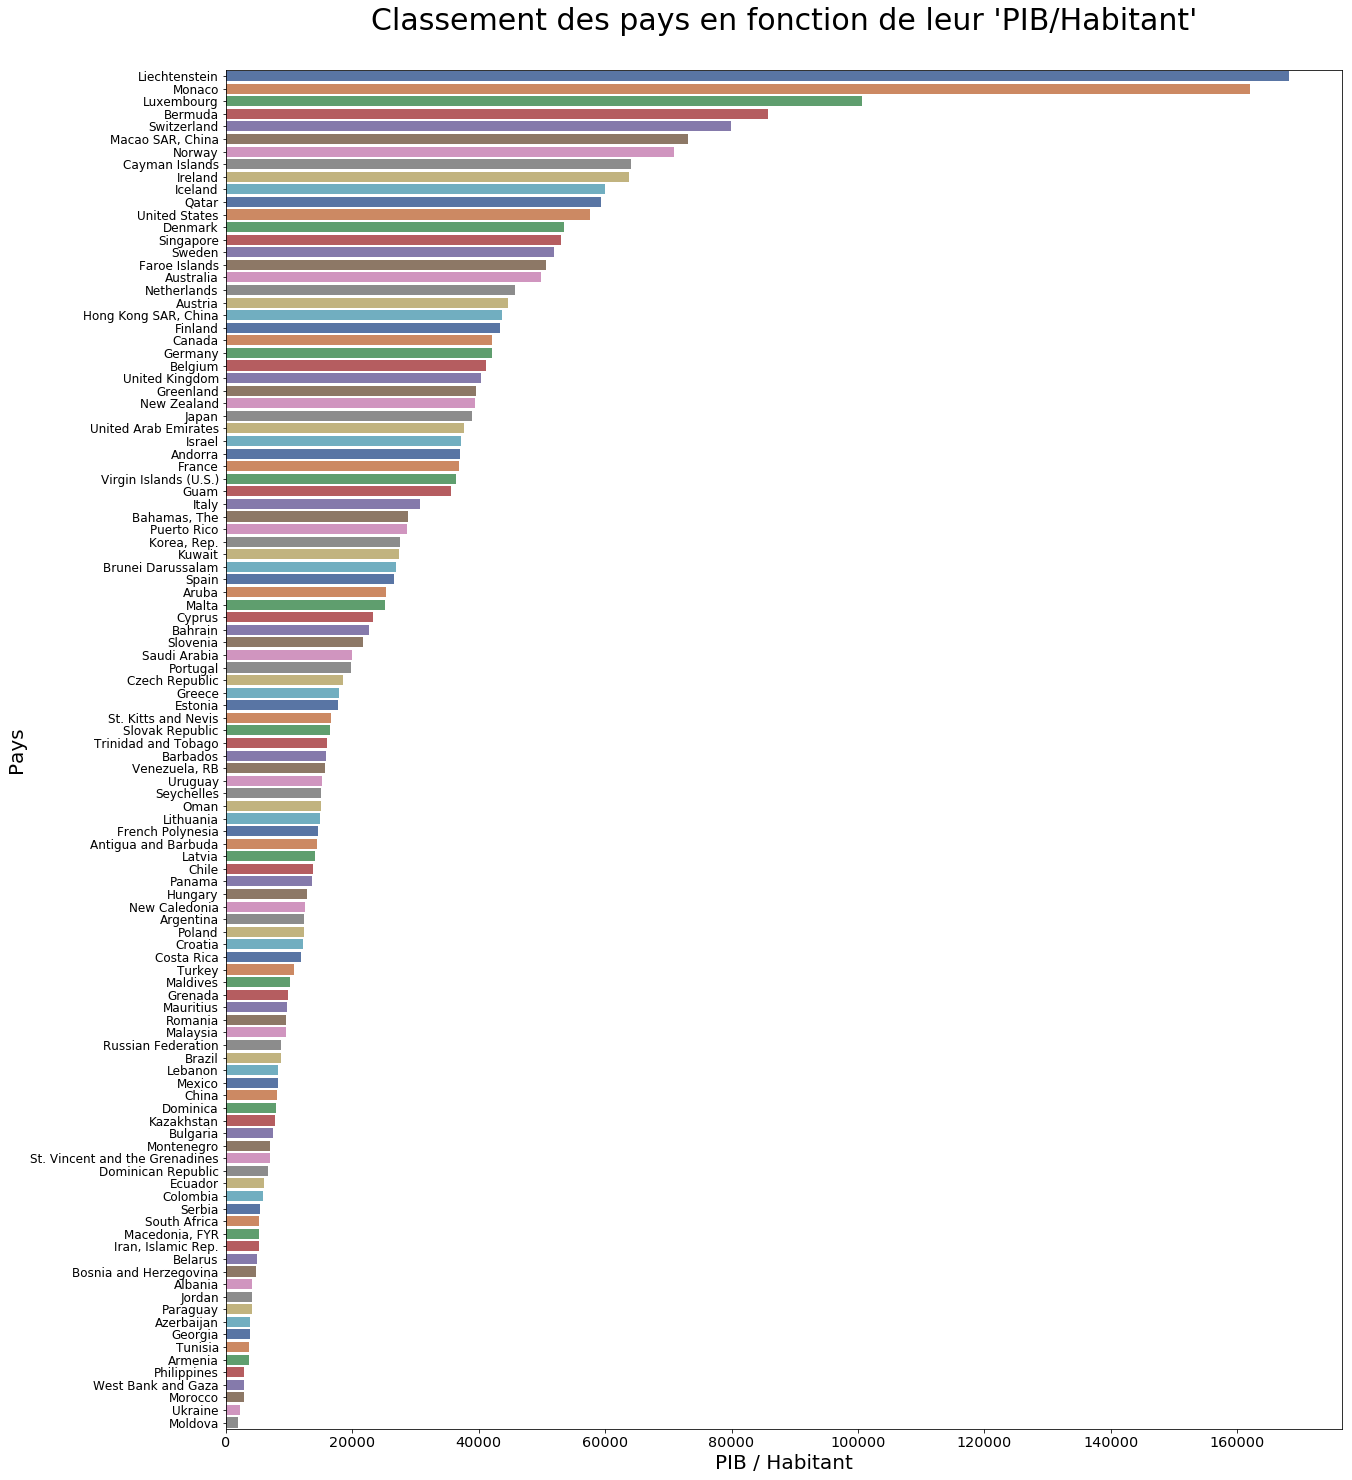

In [13]:
fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot(111)
ax.set_title('Classement des pays en fonction de leur \'PIB/Habitant\'\n', loc='center', fontsize=30)

chart = sns.barplot(
    data=data,
    x='PIB/Habitant', 
    y='Country Name',
    palette="deep"
)

chart.set_xlabel('PIB / Habitant',fontsize = 20) #xlabel
chart.set_ylabel('Pays', fontsize = 20)#ylabel

plt.xticks(
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
)

plt.yticks(
    fontweight='light',
    fontsize='large'
)


<p>Même si le graphique n'est pas très lisible dans le détail, <br \>il nous permet de nous rendre compte des <br \><b>grandes différences de richesses</b> existantes entre <br \>les <b>habitants des différents pays du monde</b>.</p>

<h4>Graphique en boite à moustache</h4>

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text yticklabel objects>)

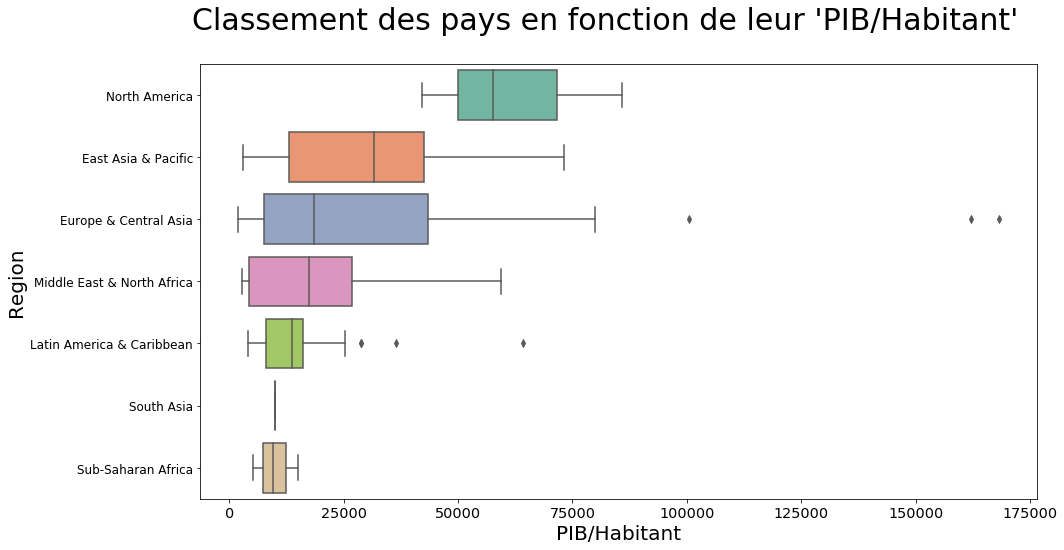

In [14]:
fig = plt.figure(figsize=(15,8))
fig.suptitle('Classement des pays en fonction de leur \'PIB/Habitant\'', fontsize=30)

chart = sns.boxplot(
    data=data,
    x='PIB/Habitant',
    y='Region',
    palette='Set2',
    order=data.groupby('Region').median().sort_values(by='PIB/Habitant', ascending=False).index
)

chart.set_xlabel('PIB/Habitant',fontsize = 20) #xlabel
chart.set_ylabel('Region', fontsize = 20)#ylabel

plt.xticks(
#     rotation=45, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
)

plt.yticks(
    fontweight='light',
    fontsize='large'
)

<p><ul><li>Ce graphique nous permet de noter que la région '<b>North America</b>' <br \>se distingue du reste du monde par son <u>PIB/Habitant élevé</u>.</li>
<li>On note également que les régions '<b>East Asia & Pacific</b>' et <br \>'<b>Europe & Central Asia</b>' on dans leur dernier quartile des <br \>valeurs de <u>PIB/Habitant très élevé</u>.</li>
<li>La région '<b>Middle East & North Africa</b>' possède des pays <br \>au <u>PIB/Habitant élevé mais en nombre restreint</u>.</li>
<li><u>Un seul pays seulement</u> de la région '<b>Latin America & Caribbean</b>' <br \>possède un <u>PIB/Habitant élevé</u>.</li></ul></p>

<p>Suite à l'analyse des données du <u>graphique en bar</u> et à l'analyse des <u>pays à faible PIB/Habitant</u>, <br \>
    je décide de <u>retenir</u>, pour la phase finale de mon analyse, <u>les pays qui ont un <b>PIB/Habitant <br \>
    supérieur à 17 000$/an</b></u>.</p>

<p>Nombre de pays sélectionnés de cette manière: </p>

In [15]:
print('{} pays sélectionnés'.format(len(data[data['PIB/Habitant'] > 17000])))

51 pays séléctionnés


<p>Je sauvegarde la valeur de l'indice minimal retenu dans un fichier via <b>Pickle</b> 
    pour l'utiliser dans la phase finale de mon analyse.</p>

In [16]:
pickle.dump(17000, open('indiceGDPMinBackup', 'wb'))

<h4>Graphique en bar avec PIB/Habitant > 17000$/an</h4>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text yticklabel objects>)

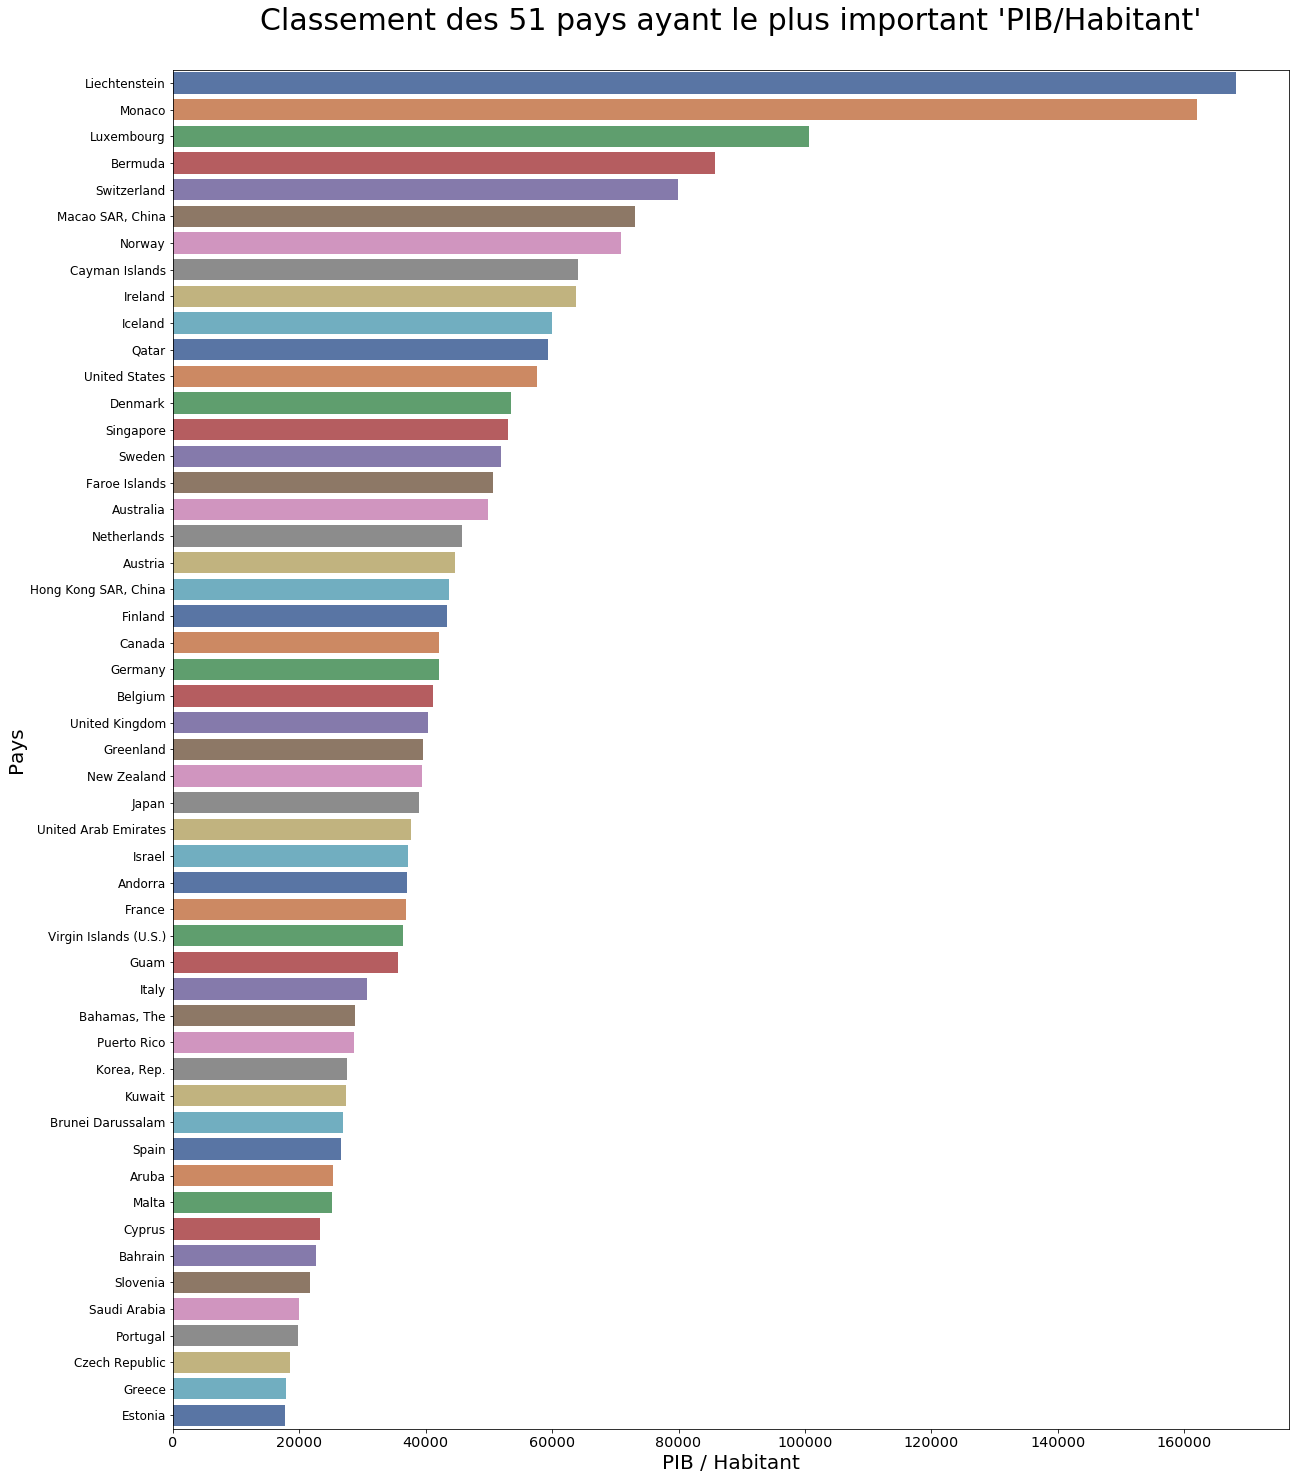

In [17]:
fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot(111)
# fig.suptitle('Classement des pays en fonction de leur \'PIB/Habitant\'', fontsize=50)
ax.set_title('Classement des 51 pays ayant le plus important \'PIB/Habitant\'\n', loc='center', fontsize=30)

chart = sns.barplot(
    data=data[data['PIB/Habitant'] > 17000],
    x='PIB/Habitant', 
    y='Country Name',
    palette="deep"
)

chart.set_xlabel('PIB / Habitant',fontsize = 20) #xlabel
chart.set_ylabel('Pays', fontsize = 20)#ylabel

plt.xticks(
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
)

plt.yticks(
    fontweight='light',
    fontsize='large'
)

<h4>Graphique en bar des 20 pays ayant le PIB/Habitant le plus élevé</h4>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text yticklabel objects>)

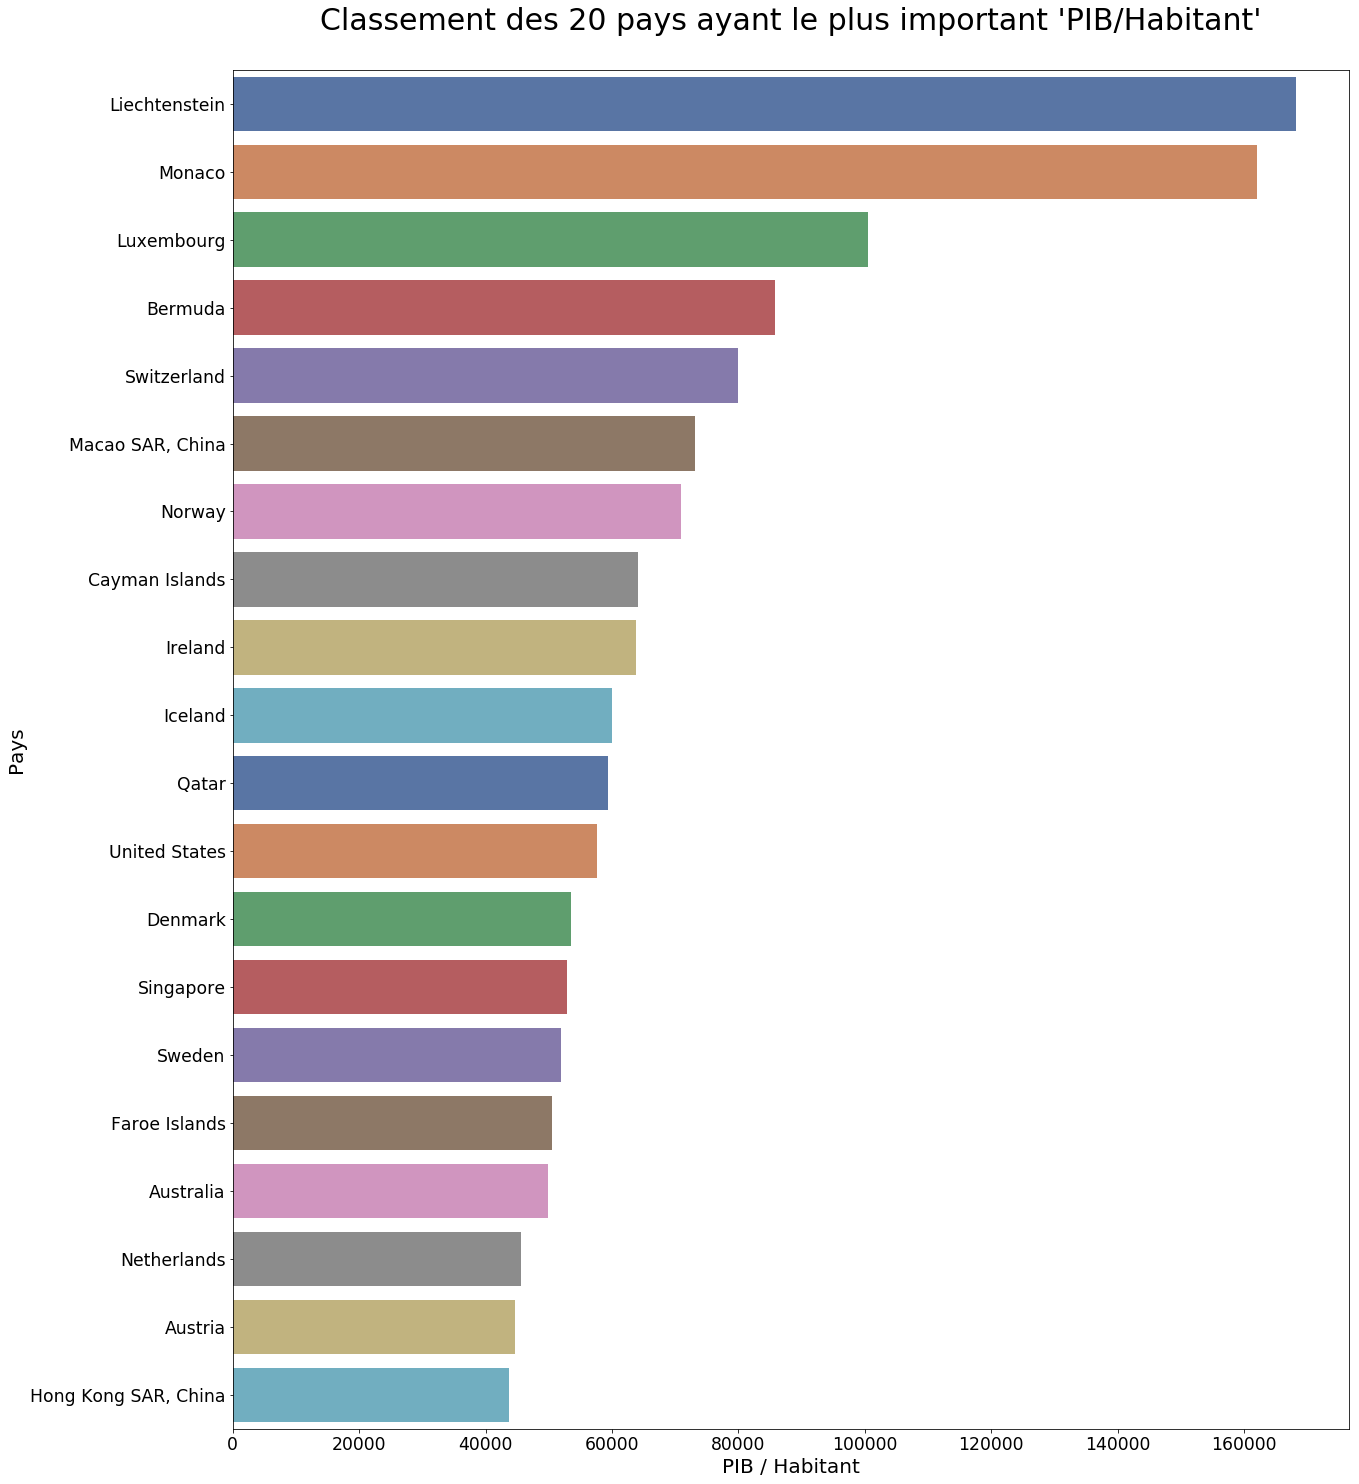

In [18]:
fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot(111)
ax.set_title('Classement des 20 pays ayant le plus important \'PIB/Habitant\'\n', loc='center', fontsize=30)

chart = sns.barplot(
    data=data.nlargest(20,'PIB/Habitant'),
    x='PIB/Habitant', 
    y='Country Name',
    palette="deep"
)

chart.set_xlabel('PIB / Habitant',fontsize = 20) #xlabel
chart.set_ylabel('Pays', fontsize = 20) #ylabel

plt.xticks(
    horizontalalignment='center',
    fontweight='light',
    fontsize='xx-large'  
)

plt.yticks(
    fontweight='light',
    fontsize='xx-large'
)

<p>Fin de l'analyse de l'indicateur de richesse <b>NY.GDP.PCAP.CD</b></p>